# Predicting Fraudaulent Transaction

## Description of a Dataset
This dataset contain 10 columns and 6362620 rows and this dataset contain attributes such as type,amount and isFraud etc.
I am  going to analyze the data deeply and try to get some useful insights to predict fraud transactions for a financial       company.I am going to develop machine learning model by using classification algorithms like random forest.
I am going to use pandas, numpy library for analysis, matplotlib for visualization and sklearn for training and testing         data.
    
It includes 11 variables.These variables are described below: 

   1. step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days        s s       simulation).
    
   2. type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

   3. amount - amount of the transaction in local currency.

   4. nameOrig - customer who started the transaction

   5. oldbalanceOrg - initial balance before the transaction

   6. newbalanceOrig - new balance after the transaction

   7. nameDest - customer who is the recipient of the transaction

   8. oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that       start with M (Merchants).

   9. newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start       with M (Merchants).

   10. isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the            fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by          transferring to another account and then cashing out of the system.

   11. isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal            attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

## Goal of the Project
In this projet, We're going to develp a model for predicting fraudulent transactions for a finanicial company and use insights from the model to develop an actionable plan. 

## Tools used
    1. pandas for data manipulation
    2. numpy is mostly used for working in numerical values
    3. Seaborn and matplotlib  for visualization graph.
    4. Sklearn for training and testing data

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df=pd.read_csv("Fraud.csv",index_col="step")
df

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,,,,,,,,,,
1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0


### Data Preprocessing

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6362620 entries, 1 to 743
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   nameOrig        object 
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        object 
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 534.0+ MB


In [127]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [128]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [129]:
df.duplicated().sum()

0

##### In this dataset there is no duplicate values

In [130]:
df.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

##### In this dataset, there is no missing values.

In [131]:
df.select_dtypes(exclude="object").corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


1.This shows that there is a very high positive correlation between oldbalanceDest and newbalanceDest.
2.There is high multicollinearity between oldbalanceOrg and newbalanceOrig, and between oldbalanceDest and newbalanceDest. 

In [132]:
df["balanceDifferenceOrig"]=df["oldbalanceOrg"]-df["newbalanceOrig"]
df['balanceDifferenceDest'] = df['oldbalanceDest'] - df['newbalanceDest']


In [133]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDifferenceOrig,balanceDifferenceDest
step,,,,,,,,,,,,
1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [134]:
df=df.drop(["nameOrig","nameDest"],axis=1)

##### nameOrig: Identifier for the source account. Typically not useful for prediction as it's more of an identifier rather than a feature with predictive power.
##### nameDest: Identifier for the destination account. Same reason as nameOrig.
That's why drop these variables

## Perform EDA

In [135]:
df.select_dtypes(exclude="object").corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDifferenceOrig,balanceDifferenceDest
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295,0.102337,-0.845964
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835,-0.220297,0.087032
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776,-0.267750,0.094456
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513,-0.047460,-0.232316
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529,-0.006451,-0.436191
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109,0.362472,-0.027028
isFlaggedFraud,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000,0.000230,0.000242
balanceDifferenceOrig,0.102337,-0.220297,-0.267750,-0.047460,-0.006451,0.362472,0.000230,1.000000,-0.169292
balanceDifferenceDest,-0.845964,0.087032,0.094456,-0.232316,-0.436191,-0.027028,0.000242,-0.169292,1.000000


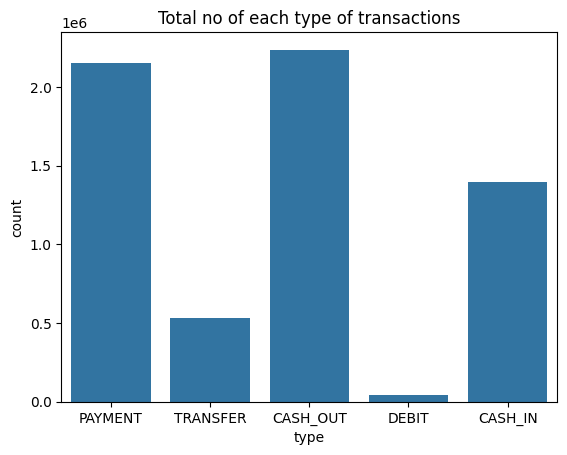

In [138]:
sns.countplot(x=df["type"])
plt.title('Total no of each type of transactions')
plt.show()

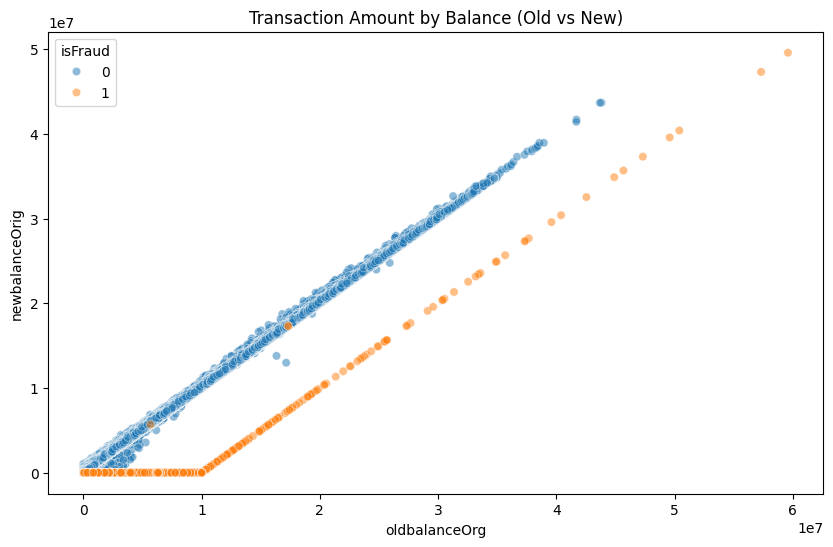

In [151]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', data=df, alpha=0.5)
plt.title('Transaction Amount by Balance (Old vs New)')
plt.show()

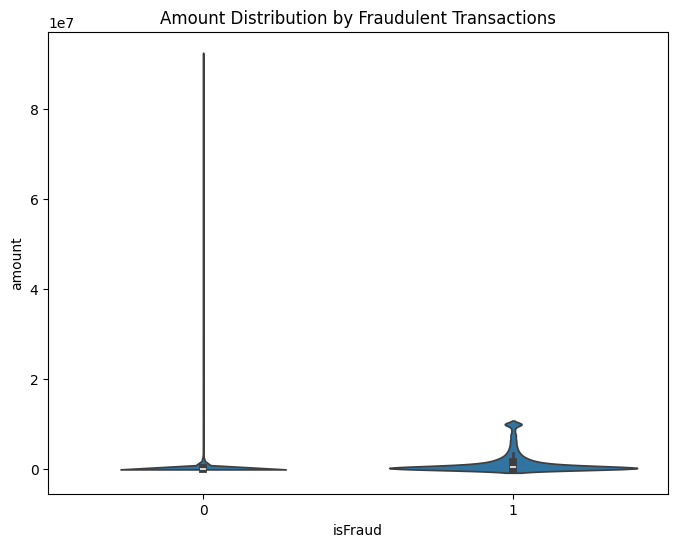

In [150]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='isFraud', y='amount', data=df)
plt.title('Amount Distribution by Fraudulent Transactions')
plt.show()

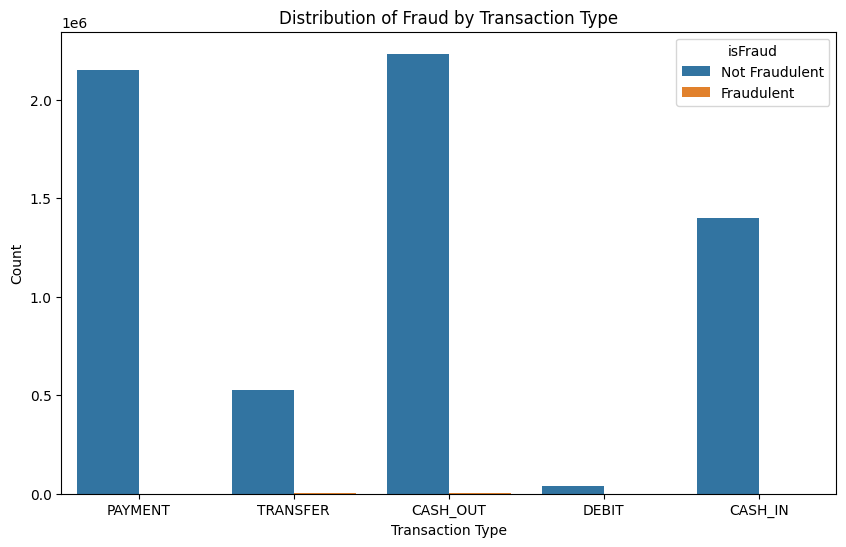

In [145]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', hue='isFraud')

plt.title('Distribution of Fraud by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='isFraud', labels=['Not Fraudulent', 'Fraudulent'])

plt.show()

### Label Encoding

In [152]:
from sklearn.preprocessing import LabelEncoder

In [153]:
label_encoder =LabelEncoder()

In [154]:
df['type']= label_encoder.fit_transform(df['type']) 

In [155]:
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDifferenceOrig,balanceDifferenceDest
step,,,,,,,,,,
1,3,9839.64,170136.00,160296.36,0.00,0.00,0,0,9839.64,0.00
1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0,1864.28,0.00
1,4,181.00,181.00,0.00,0.00,0.00,1,0,181.00,0.00
1,1,181.00,181.00,0.00,21182.00,0.00,1,0,181.00,21182.00
1,3,11668.14,41554.00,29885.86,0.00,0.00,0,0,11668.14,0.00
...,...,...,...,...,...,...,...,...,...,...
743,1,339682.13,339682.13,0.00,0.00,339682.13,1,0,339682.13,-339682.13
743,4,6311409.28,6311409.28,0.00,0.00,0.00,1,0,6311409.28,0.00
743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,6311409.28,-6311409.27


## train and test data splitting


In [156]:
x= df.drop('isFraud', axis=1)
y = df['isFraud']

In [157]:
x

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,balanceDifferenceOrig,balanceDifferenceDest
step,,,,,,,,,
1,3,9839.64,170136.00,160296.36,0.00,0.00,0,9839.64,0.00
1,3,1864.28,21249.00,19384.72,0.00,0.00,0,1864.28,0.00
1,4,181.00,181.00,0.00,0.00,0.00,0,181.00,0.00
1,1,181.00,181.00,0.00,21182.00,0.00,0,181.00,21182.00
1,3,11668.14,41554.00,29885.86,0.00,0.00,0,11668.14,0.00
...,...,...,...,...,...,...,...,...,...
743,1,339682.13,339682.13,0.00,0.00,339682.13,0,339682.13,-339682.13
743,4,6311409.28,6311409.28,0.00,0.00,0.00,0,6311409.28,0.00
743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,6311409.28,-6311409.27


In [158]:
y

step
1      0
1      0
1      1
1      1
1      0
      ..
743    1
743    1
743    1
743    1
743    1
Name: isFraud, Length: 6362620, dtype: int64

In [159]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [160]:
from sklearn.preprocessing import StandardScaler

In [161]:
scaler=StandardScaler()

In [162]:
x_train=scaler.fit_transform(x_train)

In [163]:
x_train

array([[ 9.52197605e-01, -2.96717524e-01, -2.86793838e-01, ...,
        -1.47005582e-03,  1.45979617e-01,  1.52672021e-01],
       [ 1.69281002e+00,  1.88341759e+00, -2.64051144e-01, ...,
        -1.47005582e-03,  6.27211759e-01, -1.46756888e+00],
       [ 9.52197605e-01, -2.80938693e-01, -2.88324110e-01, ...,
        -1.47005582e-03,  1.50193414e-01,  1.52672021e-01],
       ...,
       [ 9.52197605e-01, -2.91863548e-01, -2.86881371e-01, ...,
        -1.47005582e-03,  1.65988659e-01,  1.52672021e-01],
       [-5.29027220e-01,  1.83033886e-01, -2.88617156e-01, ...,
        -1.47005582e-03,  1.44434409e-01, -2.04088652e-01],
       [ 1.69281002e+00,  9.91125906e-01, -2.88575638e-01, ...,
        -1.47005582e-03,  1.45250325e-01, -8.26958772e-01]])

In [164]:
x_test=scaler.transform(x_test)

### Logistic Regression model
A Logistic Regression model, despite its name, is actually a linear model used for binary classification tasks. It models the probability of a binary outcome based on one or more predictor variables.

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [166]:
model1=LogisticRegression()

In [167]:
model1.fit(x_train,y_train)

LogisticRegression()

In [168]:
y_pred1=model1.predict(x_test)

In [169]:
from sklearn.metrics import accuracy_score

In [170]:
accuracy_score(y_test,y_pred1)


0.9992377353983107

#### Demonstrate the performane of the Logistic Regression model

In [171]:
report1=classification_report(y_pred1,y_test)
print(report1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1271698
           1       0.45      0.86      0.59       826

    accuracy                           1.00   1272524
   macro avg       0.73      0.93      0.80   1272524
weighted avg       1.00      1.00      1.00   1272524



### Random Forest
A Random Forest model is an ensemble learning technique, specifically designed        for classification tasks, that combines multiple decision trees to improve the        overall predictive performance and reduce the risk of overfitting. 

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [173]:
model2=RandomForestClassifier(n_estimators=10,criterion="entropy")

In [174]:
model2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [175]:
y_pred2=model2.predict(x_test)

In [176]:
accuracy_score(y_test,y_pred2)

0.9997446020664443

#### Demonstrate the performane of the random forest model

In [177]:
report2=classification_report(y_pred2,y_test)
print(report2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1271159
           1       0.83      0.96      0.89      1365

    accuracy                           1.00   1272524
   macro avg       0.92      0.98      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



### XGBoost Classifier
XGBoost is a popular and powerful machine learning algorithm used primarily for classification tasks .It’s a type of gradient boosting framework that leverages decision trees in a unique way to enhance predictive performance.

In [178]:
import xgboost as xgb

In [179]:
model3 = xgb.XGBClassifier(eval_metric='logloss',n_estimators=100,learning_rate=0.1,random_state=42,verbose=0)

In [180]:
model3.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [23:44:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [181]:
y_pred3=model3.predict(x_test)

In [182]:
accuracy_score(y_test,y_pred3)

0.9996510871307732

#### Demonstrate the performane of the XGboost classification model

In [183]:
report3=classification_report(y_pred3,y_test)
print(report3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1271340
           1       0.74      0.97      0.84      1184

    accuracy                           1.00   1272524
   macro avg       0.87      0.99      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



### Model Selection

All of these three models,we can see that "RandomForestclassifier" model have high F1-score value indicates the model performs well in terms of correctly identifying instances.

### Feature Importance

In terms of RandomForestClassifier We extract feature importances from the trained model using the feature_importances_ attribute.

In [184]:
importances = model2.feature_importances_
features = x.columns

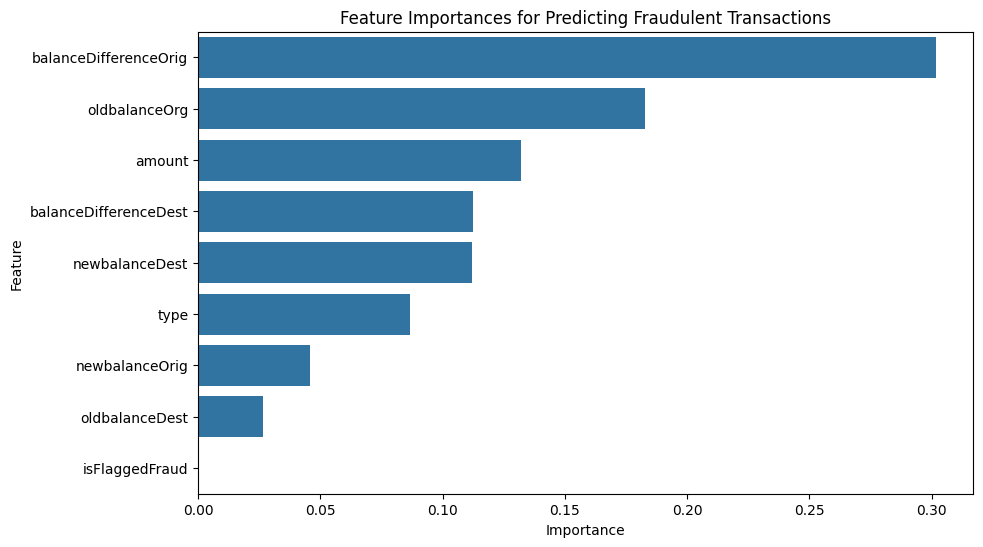

In [185]:
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances for Predicting Fraudulent Transactions')
plt.show()

 In above graph, shows that these are the key factors that predict fraudulent customer

### What kind of prevention should be adopted while company update its infrastructure?


When a company updates its infrastructure, adopting prevention measures is crucial to safe sensitive data, ensure smooth operations, and protect the organization from cybersecurity threats.There are several prevention strategies that can be adopted:
1.Data encryption
2.Access Controls
3.Network Security
4.Data Backup and Recovery
5.Third party risk management

### Assuming these actions have been implemented, how would you determine if they work?

1.Monitor security metrics such as the number of attempted intrusions, successful breaches, and anomalies detected by IDS/IPS systems.
2.Measure the time and effectiveness of incident response teams in handling security incidents, minimizing impact, and restoring systems.
3.Gather feedback and assessments from employees regarding their understanding of security protocols and practices.
4.onduct phishing tests and awareness campaigns to assess employee responses and identify potential vulnerabilities.